# Master Forgery

### Program to extract a high quality image of a signature or signatures from any image on plain white paper. Extracts images with a completely white background, and crops to remove most of the plain paper.

(np.float64(-0.5), np.float64(2507.5), np.float64(1815.5), np.float64(-0.5))

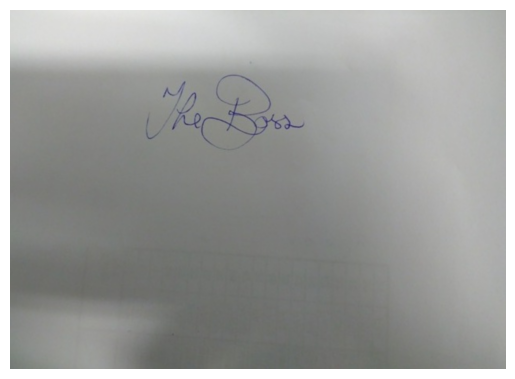

In [201]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image

imageIn = cv2.imread("Boss.png")

imageIn = cv2.cvtColor(imageIn, cv2.COLOR_BGR2RGB)
imageOriginal = imageIn.copy()

h, w, d = imageIn.shape
imageIn = cv2.resize(imageIn, dsize=(4*w, 4*h))

plt.imshow(imageIn)
plt.axis('off')

(np.float64(-0.5), np.float64(2507.5), np.float64(1815.5), np.float64(-0.5))

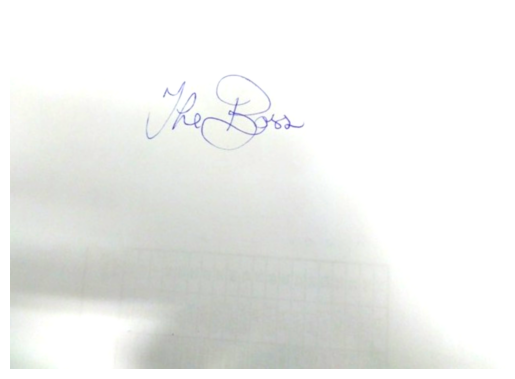

In [202]:
blurKernel = np.array([[14,15,14], [15,16,15], [14,15,14]], dtype=float)/99

smooth = cv2.filter2D(imageIn,ddepth=-1,kernel=blurKernel)
smooth = cv2.filter2D(smooth,ddepth=-1,kernel=blurKernel)

plt.imshow(smooth)
plt.axis('off')

(np.float64(-0.5), np.float64(2507.5), np.float64(1815.5), np.float64(-0.5))

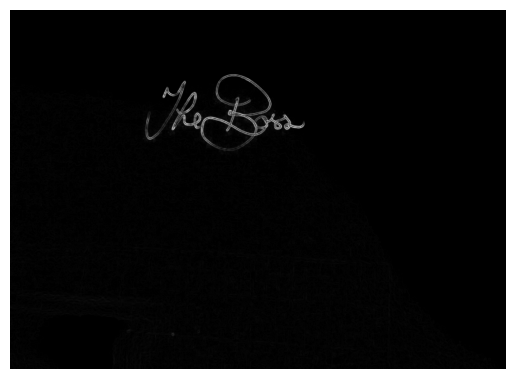

In [203]:
grayScale = cv2.cvtColor(smooth, cv2.COLOR_RGB2GRAY)

Ix = cv2.Sobel(grayScale,ddepth=cv2.CV_64F,dx=1,dy=0)
Iy = cv2.Sobel(grayScale,ddepth=cv2.CV_64F,dx=0,dy=1)

magnitude = np.sqrt((Ix * Ix) + (Iy * Iy))

plt.imshow(magnitude, cmap="gray")
plt.axis('off')

2.44528597093936
50


(np.float64(-0.5), np.float64(804.5), np.float64(382.5), np.float64(-0.5))

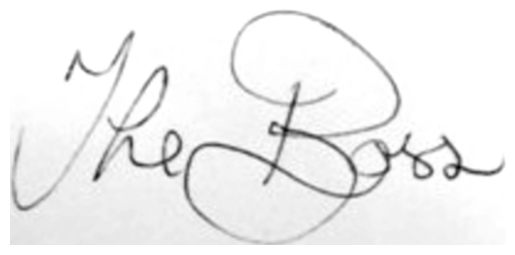

In [ ]:

cropGuide = magnitude
cropThresh = round((np.mean(magnitude)*109.75382) - 256.583)

if cropThresh > 200:
    cropThresh = 200

if cropThresh < 50:
    cropThresh = 50

print(np.mean(magnitude))
print(cropThresh)

right = max(np.where(cropGuide > cropThresh)[1])
left = min(np.where(cropGuide > cropThresh)[1])
bottom = max(np.where(cropGuide > cropThresh)[0])
top = min(np.where(cropGuide > cropThresh)[0])

imageYUV = cv2.cvtColor(smooth, cv2.COLOR_RGB2YUV)

brightness = imageYUV[:,:,0]

croppedImage = brightness[top:bottom, left:right]

plt.show()
plt.imshow(croppedImage, cmap="gray")
plt.axis('off')

True

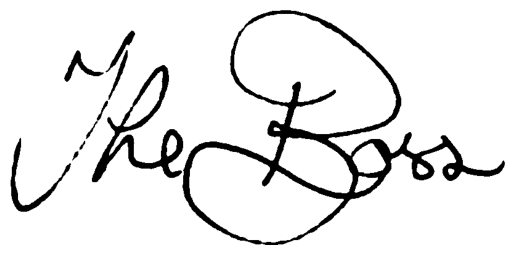

In [ ]:
imgThresh = np.mean(croppedImage) - np.std(croppedImage)

imgThresh, output = cv2.threshold(croppedImage, thresh = imgThresh, maxval = 255, type = cv2.THRESH_BINARY)

plt.imshow(output, cmap="gray")
plt.axis('off')
cv2.imwrite("signature_extract.png", output)